In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_ae_sql(location):
    epsilons = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1]
    optgem_sql = []
    optgem_ae = []
    plmg_sql = []
    plmg_ae = []
    optgeoi_sql = []
    
    optgeoi_ae = []
    optgem_epsilons = []
    multiple = 1e3

    for epsilon in epsilons:
        df = pd.read_csv(f"results/{location}_epsilon{epsilon}_nchosen50.csv")
        optgem_sql.append(np.average(df["optgem_sql"]) * multiple)
        optgem_ae.append(np.average(df["optgem_ae"]) * multiple)
        plmg_sql.append(np.average(df["plmg_sql"]) * multiple)
        plmg_ae.append(np.average(df["plmg_ae"]) * multiple)
        optgeoi_sql.append(np.average(df["optgeoi_sql"]) * multiple)
        optgeoi_ae.append(np.average(df["optgeoi_ae"]) * multiple)
        optgem_epsilons.append(np.average(df["optgem_epsilon"]) * (1/multiple))

    plt.rcParams["font.size"] = 20
    fig = plt.figure()
    fig = plt.figure(figsize=(6.4, 4.8), dpi=100, facecolor='w', linewidth=0, edgecolor='w')
    ax = fig.add_subplot(111, xlabel="AE(m)", ylabel="Q$^{loss}$(m)")
    ax.plot(optgem_ae, optgem_sql, label="GEM", linestyle="-", marker="o")
    ax.plot(plmg_ae, plmg_sql, label="PLMG", linestyle="--", marker="x")
    ax.plot(optgeoi_ae, optgeoi_sql, label="OptGeoI", linestyle="-.", marker="s")
    ax.grid()
    ax.legend()
    plt.savefig(f"figures/ae_sql_{location}.png", bbox_inches="tight")
    #ax.set_xlim(1000, 2500)
    
def plot_epsilon_sql(location):
    epsilons = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1]
    optgem_sql = []
    optgem_ae = []
    plmg_sql = []
    plmg_ae = []
    optgeoi_sql = []
    optgeoi_ae = []
    optgem_epsilons = []
    multiple = 1e3

    for epsilon in epsilons:
        df = pd.read_csv(f"results/{location}_epsilon{epsilon}_nchosen50.csv")
        optgem_sql.append(np.average(df["optgem_sql"])*multiple)
        optgem_ae.append(np.average(df["optgem_ae"])*multiple)
        plmg_sql.append(np.average(df["plmg_sql"])*multiple)
        plmg_ae.append(np.average(df["plmg_ae"])*multiple)
        optgeoi_sql.append(np.average(df["optgeoi_sql"])*multiple)
        optgeoi_ae.append(np.average(df["optgeoi_ae"])*multiple)
        optgem_epsilons.append(np.average(df["optgem_epsilon"]))

    plt.rcParams["font.size"] = 20
    fig = plt.figure()
    fig = plt.figure(figsize=(6.4, 4.8), dpi=100, facecolor='w', linewidth=0, edgecolor='w')
    ax = fig.add_subplot(111, xlabel="epsilon", ylabel="Q$^{loss}$(m)")
    ax.plot(optgem_epsilons, optgem_sql, label="GEM", linestyle="-", marker="o")
    ax.plot(np.array(epsilons), plmg_sql, label="PLMG", linestyle="--", marker="x")
    ax.plot(np.array(epsilons), optgeoi_sql, label="OptGeoI", linestyle="-.", marker="s")
    ax.grid()
    ax.legend()
    ax.set_xlim(0.5,2.3)
    plt.savefig(f"figures/epsilon_sql_{location}.png", bbox_inches="tight")
    #ax.set_xlim(1000, 2500)

In [2]:
import share
map_akita = share.RoadNetworkMap("Akita")

/home/takagi/src/miniconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/src/miniconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [18]:
import osmnx as ox
import networkx as nx
G = ox.graph_from_point((39.898740, 140.247766), network_type="walk", dist_type="bbox", dist=2000, simplify=True)

TypeError: plot_graph() got an unexpected keyword argument 'bgcolorz'

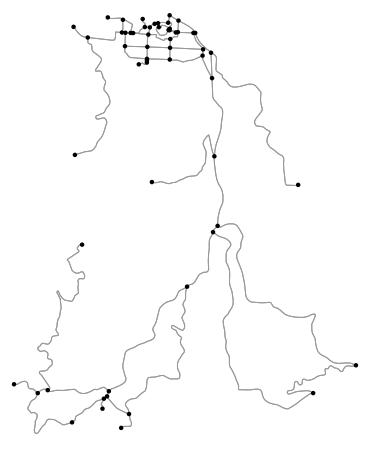

In [23]:
fig, ax = ox.plot_graph(G, node_color="black", bgcolor="white", node_size=20)
fig.savefig("figures/Akita.png", bbox_inches="tight")

In [20]:
len(G.nodes)

58

<Figure size 432x288 with 0 Axes>

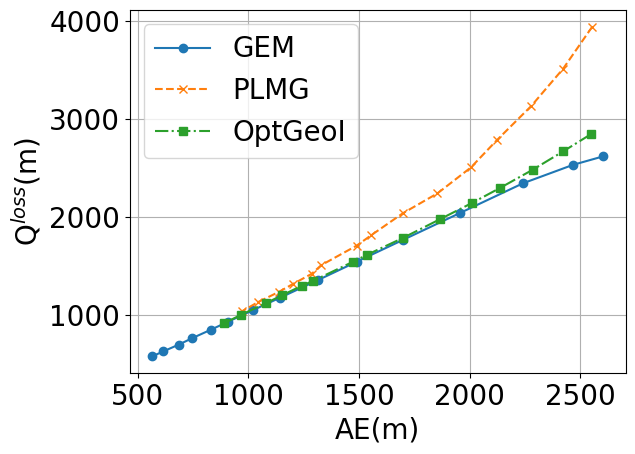

In [ ]:
plot_ae_sql("Akita")

<Figure size 432x288 with 0 Axes>

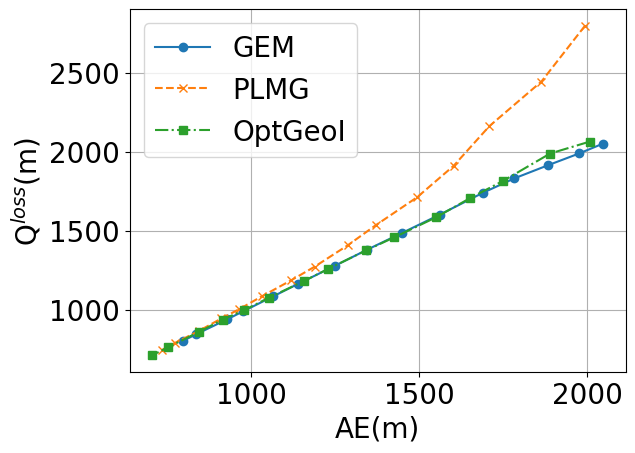

In [ ]:
plot_ae_sql("Tokyo")

<Figure size 432x288 with 0 Axes>

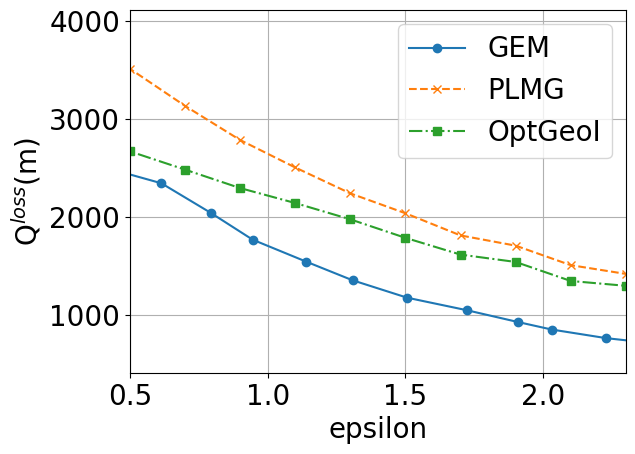

In [ ]:
plot_epsilon_sql("Akita")

<Figure size 432x288 with 0 Axes>

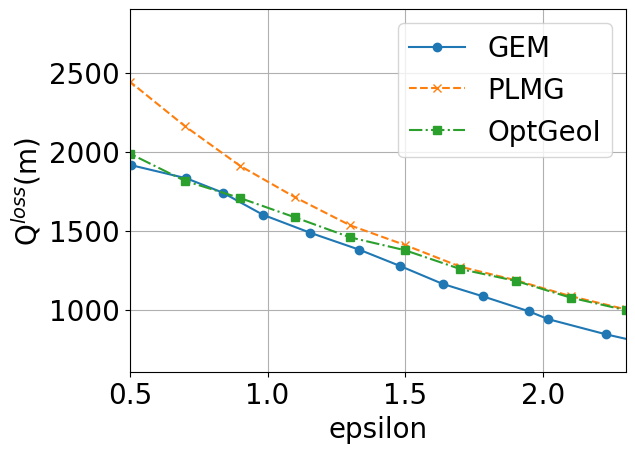

In [3]:
plot_epsilon_sql("Tokyo")
